In [64]:
# EDA.ipynb

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Set plot style
sns.set(style="whitegrid")

# Load the data
data = pd.read_csv('/Users/habeeb/Downloads/Git/ML/AXIS/Data/cleaned_fraud_data.csv')

# Display the first few rows
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Unnamed: 33,Unnamed: 34,Statement
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,0,Single,...,0,External,none,1 year,3 to 4,1994,Liability,-,Sport - Liability,True
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,1,Single,...,0,External,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,1,Married,...,0,External,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,1,Married,...,0,External,more than 5,no change,1 vehicle,1994,Liability,-,Sport - Liability,False
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,0,Single,...,0,External,none,no change,1 vehicle,1994,Collision,-,Sport - Collision,True


In [65]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  int64 
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  int64 
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [66]:
# Display summary statistics
data.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Month,15420,12,Jan,1411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WeekOfMonth,15420.0,NaN,NaN,NaN,2.788586,1.287585,1.0,2.0,3.0,4.0,5.0
DayOfWeek,15420,7,Monday,2616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Make,15420,19,Pontiac,3837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccidentArea,15420,2,Urban,13822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DayOfWeekClaimed,15420,7,Monday,3758,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthClaimed,15420,12,Jan,1447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WeekOfMonthClaimed,15420.0,NaN,NaN,NaN,2.693969,1.259115,1.0,2.0,3.0,4.0,5.0
Sex,15420.0,NaN,NaN,NaN,0.843061,0.363755,0.0,1.0,1.0,1.0,1.0
MaritalStatus,15420,4,Married,10625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Metadata Brief:

1. **Month** (`object`)
   - Contains 3-letter abbreviations for the months of the year.

2. **WeekOfMonth** (`int64`)
   - Represents the week in the month when the accident occurred.

3. **DayOfWeek** (`object`)
   - Contains days of the week (e.g., Monday, Tuesday, etc.).

4. **Make** (`object`)
   - Contains a list of 19 car manufacturers.

5. **AccidentArea** (`object`)
   - Classifies accident areas as "Urban" or "Rural."

6. **DayOfWeekClaimed** (`object`)
   - Contains the day of the week the claim was filed.

7. **MonthClaimed** (`object`)
   - Contains 3-letter abbreviations for the months the claims were filed.
   - **Issue**: Contains '0'. Investigate how many occurrences there are and their meaning (possible missing data).

8. **WeekOfMonthClaimed** (`int64`)
   - Represents the week in the month when the claim was filed.

9. **Sex** (`object`)
   - Gender of the individual making the claim.

10. **MaritalStatus** (`object`)
    - Marital status of the individual making the claim.

11. **Age** (`int64`)
    - Age of the individual making the claim.

12. **Fault** (`object`)
    - Categorizes who was deemed at fault in the accident.
    - **Action**: Convert to binary (1 for at fault, 0 for not at fault).

13. **PolicyType** (`object`)
    - Contains two pieces of information:
      - Type of insurance: Liability, all perils, or collision.
      - Category of vehicle: Sport, sedan, or utility.

14. **VehicleCategory** (`object`)
    - Contains the categorization of the vehicle (refer to `PolicyType`).

15. **VehiclePrice** (`object`)
    - Contains ranges for the value of the vehicle.

16. **FraudFound_P** (`int64`)
    - Indicates whether the claim was fraudulent (1) or not (0).
    - **Purpose**: This is the target variable for prediction.

17. **PolicyNumber** (`int64`)
    - Masked policy number, appears to be the same as the row number minus 1.

18. **RepNumber** (`int64`)
    - Represents the number of the representative handling the claim, an integer from 1 to 16.

19. **Deductible** (`int64`)
    - The deductible amount (integer values).

20. **DriverRating** (`int64`)
    - Rating scale from 1 to 4.

21. **Days_Policy_Accident** (`object`)
    - Represents the number of days between policy purchase and the accident.

22. **Days_Policy_Claim** (`object`)
    - Represents the number of days between policy purchase and claim filing.

23. **PastNumberOfClaims** (`object`)
    - Represents the previous number of claims filed by the policyholder (or claimant).

24. **AgeOfVehicle** (`object`)
    - Represents the age of the vehicle at the time of the accident.

25. **AgeOfPolicyHolder** (`object`)
    - Represents the age of the policyholder at the time of the claim.

26. **PoliceReportFiled** (`object`)
    - Indicates whether a police report was filed for the accident.

27. **WitnessPresent** (`object`)
    - Indicates whether a witness was present during the accident.

28. **AgentType** (`object`)
    - Classifies the agent handling the claim as either internal or external.

29. **NumberOfSuppliments** (`object`)
    - Likely refers to something other than daily vitamins (uncertain in context).

30. **AddressChange_Claim** (`object`)
    - Possibly represents the time between when the claim was filed and when the individual moved (i.e., filed an address change).

31. **NumberOfCars** (`object`)
    - Likely refers to the number of cars involved in the accident or the number of cars covered under the policy.

32. **Year** (`int64`)
    - Represents the year in which the accident occurred.

33. **BasePolicy** (`object`)
    - Represents the type of insurance coverage (e.g., as seen in `PolicyType`).


In [67]:
#Number of rows and columns in the dataset
data.shape

(15420, 36)

In [68]:
# Number of unique values in each column
data.nunique()


Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            7
MonthClaimed               12
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
Unnamed: 3

In [69]:
# Number of missing values in each column
data.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
Unnamed: 33             0
Unnamed: 34             0
Statement               0
dtype: int64

In [70]:

# Number of duplicate rows
data.duplicated().sum()

0

In [71]:
# Number of unique values in the target variable
data['FraudFound_P'].nunique()

2

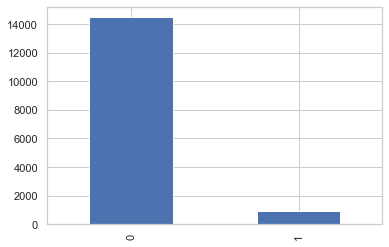

In [72]:
# Number of unique values in the target variable
data['FraudFound_P'].value_counts().plot(kind='bar')
plt.show()


In [73]:
# Gender and marital status of the accident victims (consider with all years)
df_sex_maritalstatus = data.groupby(["Sex", "MaritalStatus"]).agg({"Sex":"count"})
df_sex_maritalstatus.columns = ["Counts"]
df_sex_maritalstatus.reset_index(inplace=True)
print(df_sex_maritalstatus.head(10))


fig = px.bar(df_sex_maritalstatus, x="Sex", y="Counts",
             color='MaritalStatus', barmode='group',
             height=400,
            title = "Gender and marital status of the accident victims")
fig.show()

   Sex MaritalStatus  Counts
0    0      Divorced      40
1    0       Married    1325
2    0        Single    1031
3    0         Widow      24
4    1      Divorced      36
5    1       Married    9300
6    1        Single    3653
7    1         Widow      11


In [74]:
# Regions where accidents occurred by years
df_area_year = data.groupby(["AccidentArea", "Year"]).agg({"AccidentArea":"count"})
df_area_year.columns = ["Counts"]
df_area_year.reset_index(inplace=True)
print(df_area_year.head(10))


fig = px.bar(df_area_year, x="Year", y="Counts",
             color='AccidentArea', barmode='group',
             height=400,
            title = "Regions where accidents occurred by year")
fig.show()

  AccidentArea  Year  Counts
0        Rural  1994     642
1        Rural  1995     536
2        Rural  1996     420
3        Urban  1994    5500
4        Urban  1995    4659
5        Urban  1996    3663


In [75]:
# Create age groups
data['AgeGroup'] = pd.cut(data['Age'], bins=[18, 25, 35, 45, 55, 65, 100], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66+'])

# Group by AgeGroup and Year
df_age_year = data.groupby(["AgeGroup", "Year"]).agg({"AgeGroup":"count"})
df_age_year.columns = ["Counts"]
df_age_year.reset_index(inplace=True)

# Plot the results as a bar chart
fig = px.bar(df_age_year, x="Year", y="Counts",
             color='AgeGroup', barmode='group',
             height=400,
             title="Accidents by Driver Age Group and Year")
fig.show()


In [76]:
# Grouping by Accident Area and Year for fraud counts
df_fraud_area_year = data.groupby(["AccidentArea", "Year"]).agg({"FraudFound_P":"sum"})
df_fraud_area_year.columns = ["FraudCounts"]
df_fraud_area_year.reset_index(inplace=True)

# Plot the results as a bar chart
fig = px.bar(df_fraud_area_year, x="Year", y="FraudCounts",
             color='AccidentArea', barmode='group',
             height=400,
             title="Fraud Detection by Region and Year")
fig.show()


In [77]:
# Assuming 'AgeOfVehicle' is already cleaned or transformed into numeric form
df_vehicle_age_year = data.groupby(["AgeOfVehicle", "Year"]).agg({"AgeOfVehicle":"count"})
df_vehicle_age_year.columns = ["Counts"]
df_vehicle_age_year.reset_index(inplace=True)

# Plot the results as a bar chart
fig = px.bar(df_vehicle_age_year, x="Year", y="Counts",
             color='AgeOfVehicle', barmode='group',
             height=400,
             title="Accidents by Vehicle Age and Year")
fig.show()


In [78]:
# Grouping by Policy Type and Year for claim counts
df_policy_type_year = data.groupby(["PolicyType", "Year"]).agg({"PolicyType":"count"})
df_policy_type_year.columns = ["Counts"]
df_policy_type_year.reset_index(inplace=True)

# Plot the results as a bar chart
fig = px.bar(df_policy_type_year, x="Year", y="Counts",
             color='PolicyType', barmode='group',
             height=400,
             title="Claims by Policy Type and Year")
fig.show()


In [79]:
# Group by Fault status and Year
df_fault_year = data.groupby(["Fault", "Year"]).agg({"Fault":"count"})
df_fault_year.columns = ["Counts"]
df_fault_year.reset_index(inplace=True)

# Plot the results as a bar chart
fig = px.bar(df_fault_year, x="Year", y="Counts",
             color='Fault', barmode='group',
             height=400,
             title="Accidents by Fault Status and Year")
fig.show()


In [80]:
# Group by Deductible and Year
df_deductible_year = data.groupby(["Deductible", "Year"]).agg({"Deductible":"count"})
df_deductible_year.columns = ["Counts"]
df_deductible_year.reset_index(inplace=True)

# Plot the results as a bar chart
fig = px.bar(df_deductible_year, x="Year", y="Counts",
             color='Deductible', barmode='group',
             height=400,
             title="Claims by Deductible and Year")
fig.show()


In [81]:
# Group by Day of Week and Year
df_dayofweek_year = data.groupby(["DayOfWeek", "Year"]).agg({"DayOfWeek":"count"})
df_dayofweek_year.columns = ["Counts"]
df_dayofweek_year.reset_index(inplace=True)

# Plot the results as a bar chart
fig = px.bar(df_dayofweek_year, x="Year", y="Counts",
             color='DayOfWeek', barmode='group',
             height=400,
             title="Accidents by Day of Week and Year")
fig.show()


In [82]:
# Grouping by VehicleCategory and Year
df_vehicle_type_year = data.groupby(["VehicleCategory", "Year"]).agg({"VehicleCategory":"count"})
df_vehicle_type_year.columns = ["Counts"]
df_vehicle_type_year.reset_index(inplace=True)

# Plot the results as a bar chart
fig = px.bar(df_vehicle_type_year, x="Year", y="Counts",
             color='VehicleCategory', barmode='group',
             height=400,
             title="Accidents by Vehicle Type and Year")
fig.show()


In [83]:
# Group by WeekOfMonthClaimed and Year
df_time_of_day_year = data.groupby(["WeekOfMonthClaimed", "Year"]).agg({"WeekOfMonthClaimed":"count"})
df_time_of_day_year.columns = ["Counts"]
df_time_of_day_year.reset_index(inplace=True)

# Plot the results as a bar chart
fig = px.bar(df_time_of_day_year, x="Year", y="Counts",
             color='WeekOfMonthClaimed', barmode='group',
             height=400,
             title="Accidents by WeekOfMonthClaimed and Year")
fig.show()
